In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [127]:
df_i = pd.read_csv('../datasets/intercom/insights.csv')
df_a = pd.read_csv('../datasets/intercom/apps.csv')

df_i.head()

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping
0,g8m4lecv,71474,2015-05-29 01:23:17 UTC,29/05/2015,inbox-insights-loaded,550c4aa02eb8ab4a3a000004,28.0,day
1,g8m4lecv,71474,2015-05-29 01:23:42 UTC,29/05/2015,inbox-insights-loaded,550c4aa02eb8ab4a3a000004,90.0,day
2,m6855w1q,38924,2015-05-29 01:54:50 UTC,29/05/2015,inbox-insights-loaded,543e07cbdef76b48f4015c39,7.0,day
3,m6855w1q,38924,2015-05-29 01:54:50 UTC,29/05/2015,inbox-insights-loaded,543e07cbdef76b48f4015c39,28.0,day
4,n9mj3wdx,63919,2015-05-29 02:05:05 UTC,29/05/2015,inbox-insights-loaded,5503cba518e9d773500001ba,28.0,day


In [131]:
d_mins = df_a.groupby(['app_id', 'identifier']).created_at.transform(min)
df_a_min = df_a[df_a.created_at == d_mins]
df_pro = pd.DataFrame(df_a_min[df_a_min['identifier']=='support_pro']['app_id'])

df_pro = pd.merge(df_pro, df_i, on='app_id')

import datetime

def change_date_format(date):
    return datetime.datetime.strptime(date, "%d/%m/%Y").strftime("%Y-%m-%d")

df_pro['date'] = df_pro['created_at_date'].apply(change_date_format)

df_pro = df_pro.sort_values(by='date', ascending=True)


In [135]:
df = df_pro

In [136]:
df.head()

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping,date
16969,ehj523md,89105,2015-05-29 18:39:08 UTC,29/05/2015,inbox-insights-loaded,5565290c72a3a312b40000fa,28.0,day,2015-05-29
21445,ze4rr0vi,39457,2015-05-29 06:17:20 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,28.0,day,2015-05-29
21446,ze4rr0vi,39457,2015-05-29 06:17:23 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,7.0,day,2015-05-29
21447,ze4rr0vi,40349,2015-05-29 16:38:59 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,28.0,day,2015-05-29
21448,ze4rr0vi,40349,2015-05-29 16:39:19 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,90.0,day,2015-05-29


In [137]:
def get_week(date):
    y = int(date[0:4])
    m = int(date[5:7])
    d = int(date[8:10])
    return datetime.date(y,m,d).isocalendar()[1] - 22

df['week_number'] = df['date'].apply(get_week)

In [138]:
df.head()

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping,date,week_number
16969,ehj523md,89105,2015-05-29 18:39:08 UTC,29/05/2015,inbox-insights-loaded,5565290c72a3a312b40000fa,28.0,day,2015-05-29,0
21445,ze4rr0vi,39457,2015-05-29 06:17:20 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,28.0,day,2015-05-29,0
21446,ze4rr0vi,39457,2015-05-29 06:17:23 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,7.0,day,2015-05-29,0
21447,ze4rr0vi,40349,2015-05-29 16:38:59 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,28.0,day,2015-05-29,0
21448,ze4rr0vi,40349,2015-05-29 16:39:19 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,90.0,day,2015-05-29,0


In [139]:
df['active_period'] = df['week_number']
df = df.drop('created_at_date', 1)
df.head()

,app_id,admin_id,created_at,event_name,intercom_user_id,interval,grouping,date,week_number,active_period
16969,ehj523md,89105,2015-05-29 18:39:08 UTC,inbox-insights-loaded,5565290c72a3a312b40000fa,28.0,day,2015-05-29,0,0
21445,ze4rr0vi,39457,2015-05-29 06:17:20 UTC,inbox-insights-loaded,5445800e0bc06160d80018ea,28.0,day,2015-05-29,0,0
21446,ze4rr0vi,39457,2015-05-29 06:17:23 UTC,inbox-insights-loaded,5445800e0bc06160d80018ea,7.0,day,2015-05-29,0,0
21447,ze4rr0vi,40349,2015-05-29 16:38:59 UTC,inbox-insights-loaded,544eb35ead80b559fd00c1eb,28.0,day,2015-05-29,0,0
21448,ze4rr0vi,40349,2015-05-29 16:39:19 UTC,inbox-insights-loaded,544eb35ead80b559fd00c1eb,90.0,day,2015-05-29,0,0


In [140]:
df.set_index('app_id', inplace=True)

df['week_group'] = df.groupby(level=0)['week_number'].min().apply(lambda x: x)
df.reset_index(inplace=True)
df.head()

,app_id,admin_id,created_at,event_name,intercom_user_id,interval,grouping,date,week_number,active_period,week_group
0,ehj523md,89105,2015-05-29 18:39:08 UTC,inbox-insights-loaded,5565290c72a3a312b40000fa,28.0,day,2015-05-29,0,0,0
1,ze4rr0vi,39457,2015-05-29 06:17:20 UTC,inbox-insights-loaded,5445800e0bc06160d80018ea,28.0,day,2015-05-29,0,0,0
2,ze4rr0vi,39457,2015-05-29 06:17:23 UTC,inbox-insights-loaded,5445800e0bc06160d80018ea,7.0,day,2015-05-29,0,0,0
3,ze4rr0vi,40349,2015-05-29 16:38:59 UTC,inbox-insights-loaded,544eb35ead80b559fd00c1eb,28.0,day,2015-05-29,0,0,0
4,ze4rr0vi,40349,2015-05-29 16:39:19 UTC,inbox-insights-loaded,544eb35ead80b559fd00c1eb,90.0,day,2015-05-29,0,0,0


In [141]:
grouped = df.groupby(['week_group', 'active_period'])

cohorts = grouped.agg({'app_id': pd.Series.nunique,
                       'created_at': pd.Series.nunique})

cohorts.rename(columns={'app_id': 'total_apps',
                        'created_at': 'times_used'}, inplace=True)

cohorts[0:25]

times_used  total_apps
week_group active_period                        
0          0                     441         105
           1                     786          73
           2                     826          69
           3                     774          65
           4                     731          54
           5                     645          52
           6                     756          57
           7                     773          56
           8                     821          46
           10                    442          40
           11                    855          53
           12                    896          43
           13                    910          50
           14                    707          49
1          1                     858         209
           2                     703          93
           3                     609          90
           4                     574          90
           5                     562          83
           6                     569          81
           7                     460          87
           8                     481          73
           10                    217          45
           11                    541          65
           12                    645          66

In [142]:
def cohort_period(df):

    df['week_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts[0:20]

times_used  total_apps  week_period
week_group active_period                                     
0          0                     441         105            1
           1                     786          73            2
           2                     826          69            3
           3                     774          65            4
           4                     731          54            5
           5                     645          52            6
           6                     756          57            7
           7                     773          56            8
           8                     821          46            9
           10                    442          40           10
           11                    855          53           11
           12                    896          43           12
           13                    910          50           13
           14                    707          49           14
1          1                     858         209            1
           2                     703          93            2
           3                     609          90            3
           4                     574          90            4
           5                     562          83            5
           6                     569          81            6

In [143]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['week_group', 'week_period'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['total_apps'].groupby(level=0).first()
cohort_group_size.head()

week_group
0    105
1    209
2    139
3    121
4     86
Name: total_apps, dtype: int64

In [144]:
cohorts['total_apps'].head()

week_group  week_period
0           1              105
            2               73
            3               69
            4               65
            5               54
Name: total_apps, dtype: int64

In [145]:
cohorts['total_apps'].unstack(0).head()

week_group,0,1,2,3,4,5,6,7,8,10,11,12,13,14
week_period,,,,,,,,,,,,,,
1,105.0,209.0,139.0,121.0,86.0,97.0,104.0,88.0,101.0,69.0,88.0,98.0,105.0,63.0
2,73.0,93.0,44.0,34.0,16.0,33.0,30.0,21.0,15.0,25.0,33.0,31.0,27.0,NaN
3,69.0,90.0,41.0,27.0,20.0,21.0,25.0,14.0,20.0,25.0,26.0,27.0,NaN,NaN
4,65.0,90.0,37.0,24.0,12.0,20.0,18.0,10.0,21.0,17.0,28.0,NaN,NaN,NaN
5,54.0,83.0,39.0,23.0,14.0,12.0,23.0,19.0,26.0,10.0,NaN,NaN,NaN,NaN


In [146]:
user_retention = cohorts['total_apps'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

week_group,0,1,2,3,4,5,6,7,8,10,11,12,13,14
week_period,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.695238,0.444976,0.316547,0.280992,0.186047,0.340206,0.288462,0.238636,0.148515,0.362319,0.375000,0.316327,0.257143,NaN
3,0.657143,0.430622,0.294964,0.223140,0.232558,0.216495,0.240385,0.159091,0.198020,0.362319,0.295455,0.275510,NaN,NaN
4,0.619048,0.430622,0.266187,0.198347,0.139535,0.206186,0.173077,0.113636,0.207921,0.246377,0.318182,NaN,NaN,NaN
5,0.514286,0.397129,0.280576,0.190083,0.162791,0.123711,0.221154,0.215909,0.257426,0.144928,NaN,NaN,NaN,NaN
6,0.495238,0.387560,0.280576,0.173554,0.093023,0.206186,0.307692,0.170455,0.178218,NaN,NaN,NaN,NaN,NaN
7,0.542857,0.416268,0.338129,0.173554,0.162791,0.247423,0.240385,0.147727,NaN,NaN,NaN,NaN,NaN,NaN
8,0.533333,0.349282,0.187050,0.214876,0.116279,0.226804,0.192308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.438095,0.215311,0.309353,0.173554,0.174419,0.257732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


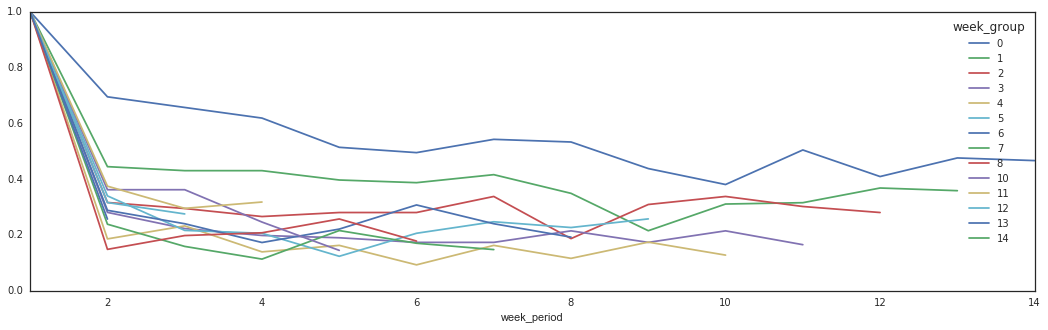

In [201]:
user_retention.plot(figsize=(18,5))

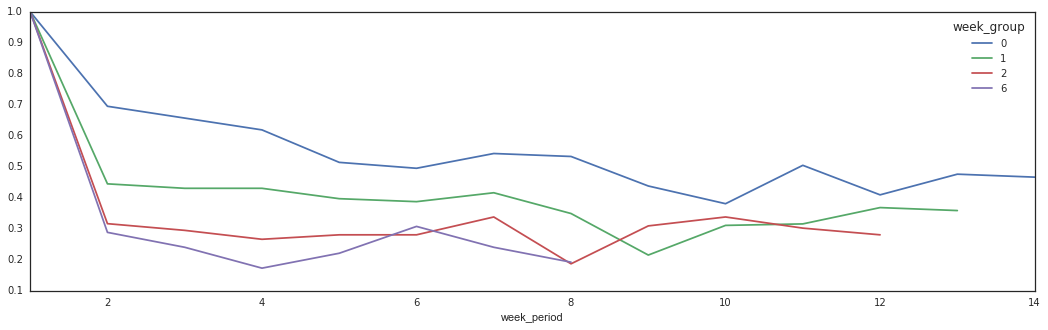

In [205]:
user_retention[[0,1,2,6]].plot(figsize=(18,5))

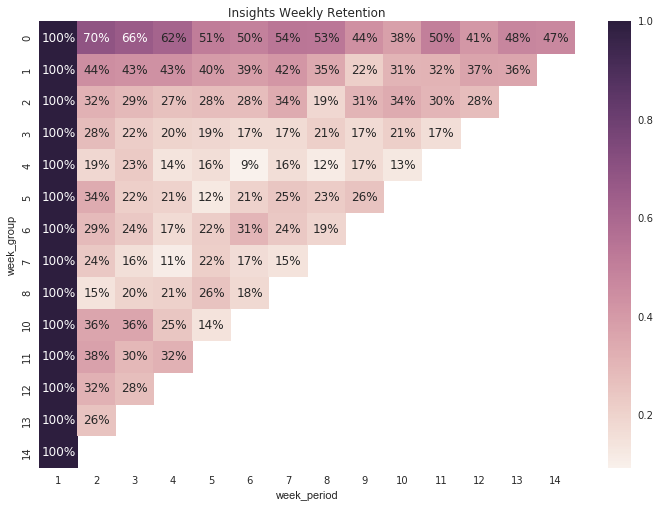

In [149]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Insights Weekly Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

In [156]:
df_pro.head()

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping,date,week_number,active_period
16969,ehj523md,89105,2015-05-29 18:39:08 UTC,29/05/2015,inbox-insights-loaded,5565290c72a3a312b40000fa,28.0,day,2015-05-29,0,0
21445,ze4rr0vi,39457,2015-05-29 06:17:20 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,28.0,day,2015-05-29,0,0
21446,ze4rr0vi,39457,2015-05-29 06:17:23 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,7.0,day,2015-05-29,0,0
21447,ze4rr0vi,40349,2015-05-29 16:38:59 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,28.0,day,2015-05-29,0,0
21448,ze4rr0vi,40349,2015-05-29 16:39:19 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,90.0,day,2015-05-29,0,0


In [157]:
df_pro.groupby(['week_number'],as_index=False).agg({'app_id': pd.Series.nunique})

,week_number,app_id
0,0,105
1,1,282
2,2,301
3,3,320
4,4,305
5,5,312
6,6,358
7,7,356
8,8,368
9,10,268


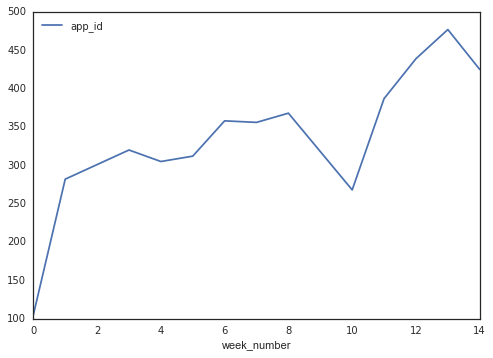

In [158]:
df_pro.groupby(['week_number'],as_index=False).agg({'app_id': pd.Series.nunique}).plot(x='week_number',
                                                                                                 y='app_id')

In [159]:
df_pro.head()

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping,date,week_number,active_period
16969,ehj523md,89105,2015-05-29 18:39:08 UTC,29/05/2015,inbox-insights-loaded,5565290c72a3a312b40000fa,28.0,day,2015-05-29,0,0
21445,ze4rr0vi,39457,2015-05-29 06:17:20 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,28.0,day,2015-05-29,0,0
21446,ze4rr0vi,39457,2015-05-29 06:17:23 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,7.0,day,2015-05-29,0,0
21447,ze4rr0vi,40349,2015-05-29 16:38:59 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,28.0,day,2015-05-29,0,0
21448,ze4rr0vi,40349,2015-05-29 16:39:19 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,90.0,day,2015-05-29,0,0


In [181]:
from datetime import date
import calendar


def get_week_day(date):
    y = int(date[0:4])
    m = int(date[5:7])
    d = int(date[8:10])
    return calendar.day_name[datetime.date(y,m,d).weekday()]

df_pro['week_day'] = df_pro['date'].apply(get_week_day)
df['week_day'] = df['date'].apply(get_week_day)


In [173]:
df_pro.head()

,app_id,admin_id,created_at,created_at_date,event_name,intercom_user_id,interval,grouping,date,week_number,active_period,week_day
16969,ehj523md,89105,2015-05-29 18:39:08 UTC,29/05/2015,inbox-insights-loaded,5565290c72a3a312b40000fa,28.0,day,2015-05-29,0,0,Friday
21445,ze4rr0vi,39457,2015-05-29 06:17:20 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,28.0,day,2015-05-29,0,0,Friday
21446,ze4rr0vi,39457,2015-05-29 06:17:23 UTC,29/05/2015,inbox-insights-loaded,5445800e0bc06160d80018ea,7.0,day,2015-05-29,0,0,Friday
21447,ze4rr0vi,40349,2015-05-29 16:38:59 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,28.0,day,2015-05-29,0,0,Friday
21448,ze4rr0vi,40349,2015-05-29 16:39:19 UTC,29/05/2015,inbox-insights-loaded,544eb35ead80b559fd00c1eb,90.0,day,2015-05-29,0,0,Friday


In [179]:
df_pro.groupby(['week_day'],as_index=False).agg({'app_id': pd.Series.nunique})

,week_day,app_id
0,Friday,681
1,Monday,646
2,Saturday,241
3,Sunday,208
4,Thursday,721
5,Tuesday,685
6,Wednesday,701


In [200]:
df_pro.groupby(['week_day'],as_index=False).size()

week_day
Friday       7016
Monday       6828
Saturday     2416
Sunday       2331
Thursday     7291
Tuesday      7134
Wednesday    7555
dtype: int64

In [193]:
df[df['week_group']==0].groupby(['week_day'],as_index=False).agg({'app_id': pd.Series.nunique})

,week_day,app_id
0,Friday,95
1,Monday,76
2,Saturday,44
3,Sunday,42
4,Thursday,71
5,Tuesday,76
6,Wednesday,73


In [198]:
df[df['week_group']==1].groupby(['week_day'],as_index=False).agg({'app_id': pd.Series.nunique})

,week_day,app_id
0,Friday,125
1,Monday,133
2,Saturday,47
3,Sunday,39
4,Thursday,133
5,Tuesday,137
6,Wednesday,139
